Тема: Анализ факторов, влияющих на зарплату сотрудников.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Описание данных.

ID - уникальный идентификатор вакансии на hh.ru.

name -  название вакансии (например, Аналитик, Бизнес-аналитик, Junior IT аналитик). Тип переменной: номинальный.

company - название компании - работадатель. Тип переменной: номинальный.

key_skills – список ключевых навыков, которые требуются для вакансии (например, SQL, Python, Анализ данных). Тип переменной: номинальный.

salary_from – нижняя граница зарплаты, указанная работодателем (если уровень зарплаты не указан - 0). Тип переменной: непрерывный.

salary_to – верхняя граница зарплаты, указанная работодателем (если уровень зарплаты не указан - 0). Тип переменной: непрерывный. 

experience – требуемый опыт работы (Нет опыта, От 1 года до 3 лет, От 3 до 6 лет, Более 6 лет). Тип переменной: ранговая/порядковая.

schedule – график работы (Полный день, Удаленная работа, Гибкий график, Сменный график). Тип переменной: номинальный.

alternate_url – ссылка на вакансию на hh.ru. Тип переменной: номинальный.

salary - среднее значение нижней (salary_from) и верхней (salary_to) границ зарплаты. Тип переменной: непрерывный.

In [2]:
data = pd.read_csv('all_vacancies.csv', encoding='CP1251', sep=';')

Разведочный анализ данных. Визуализация.

Датасет содержит 3150 строк. Пропуски NAN присутствуют в столбцах key_skills 1204 (38,22), salary_from 178 (5,56%) и salary_to 629 (20%). В столбцах salary_from и salary_to находятся значения = 0.00. Так же в датасете присутствую вакансии из других стран, для которых значения salary_from	salary_to указаны в нацианальной валюте (могли достигать 35 000 000). Такие высокие значения или наоборот низкие могут искозить значения (среднее, мидиана) для вакансий, указанных в рублях. После удаления строк содержащие значение 0.00, NaN и вакансий из других стран по столбцу salary_from в итоговом датасете осталось 997 строк. Добавлен столбец salary с данными средних значений salary_from и salary_to.

В переменной name содержится название вакансий. Уникальных значений 476.  Часто встречаемые названия вакансий "Аналитик" 111 (11,13%), "Бизнес-аналитик" 86 (8,63%), "Аналитик данных" 60 (5,82%).

В переменной city указаны города размещения вакансий. Уникальных названий городов 95. Города в которых чаще требуются аналитики Москва 404 (38%), Санкт-Петербург 117 (11,43%), Екатеринбург 44 (4,41%). В остальных городах значительно меньше размещенных вакансий. Для суммирования вакансий по региону объединил в группы (Московская область, Кировская область и другие). 

Переменная key_skills 601 уникальных навыков. Из основных навыков можно выделить "Аналитическое мышление" 237 (23,77%), использование "MS Excel" 170 (17,05%), "Работа с большим объемом информации" 139 (13,9%). Владение "SQL" и "Python"  требуется в 106 (10,6%) и 55 (5,52%) вакансиях.

Переменная salary_from. Минимальное значение 10 000, максимальное значение 210 000. Среднее значение 91205,75 и медиана 80 000.

Переменная salary_to. Минимальное значение 20 000, максимальное значение 500 000. Среднее значение 116237.84 и медиана 100 000.

Переменная experience содержит 4 уникальных значения ('От 1 года до 3 лет', 'Нет опыта', 'От 3 до 6 лет', 'Более 6 лет'). Вакансии где требуемый опыт "От 1 года до 3 лет" 647 (64,89%). Вакансий "Нет опыта" соискателя 206 (20,66%) и вакансий с опытом "От 3 до 6 лет" 161 (16,15%).

Переменная schedule содержит 4 уникальных значения ('Удаленная работа', 'Полный день', 'Гибкий график', 'Сменный график'). Вакансий с графиком работы 'Полный день' 672 (67,4%), вакансий в формате работы 'Удаленная работа' 321 (32,2%). Вакансии в формате 'Гибкий график', 'Сменный график' 4 (0,4%).

Переменная salary. Минимальное значение 10 000, максимальное значение 350 000. Среднее значение 98491.96 и медиана 90 000.


In [3]:
pd.set_option('display.float_format', '{:.2f}'.format)
data = data.query('salary_from.notna() & salary_from != 0.0') 
data = data.query('salary_from > 7000.00 & salary_from < 400001.00')
data['salary'] = (data['salary_from'] + data['salary_to']) / 2 
data['salary'] = data['salary'].fillna(data['salary_from']) 

In [4]:
name_counts = data['name'].value_counts().to_dict()
df_name = pd.DataFrame(list(name_counts.items()), columns=['name', 'cnt'])
df_name = df_name.sort_values(by='cnt', ascending=False).reset_index().head(20)

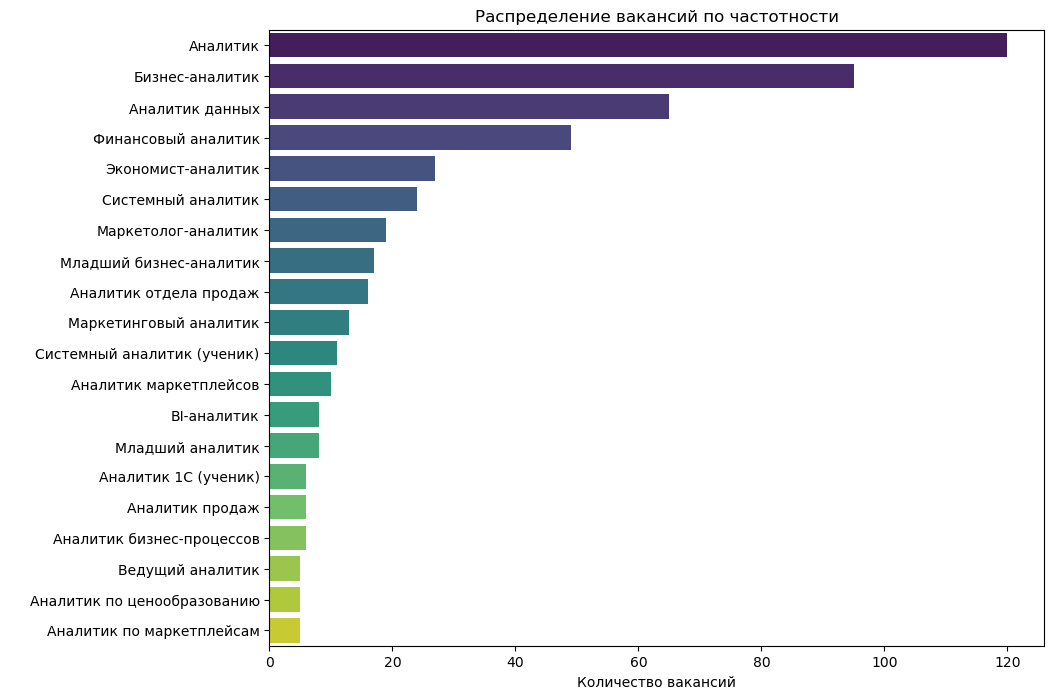

In [5]:
plt.figure(figsize=(10, 8))
sns.barplot(data=df_name, x='cnt', y='name', hue='name', palette='viridis')
plt.title('Распределение вакансий по частотности')
plt.xlabel('Количество вакансий')
plt.ylabel(' ')
plt.show()

In [27]:
df_company = data.groupby('company').size().sort_values(ascending=False).reset_index(name='cnt').head(20)

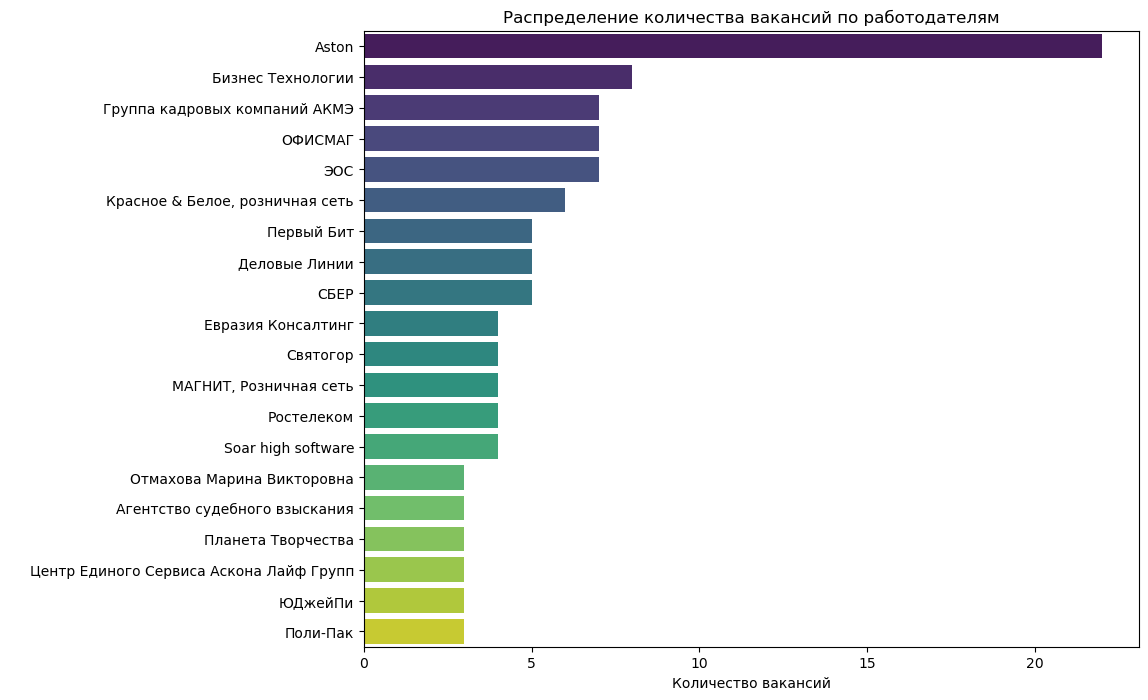

In [34]:
plt.figure(figsize=(10, 8))
sns.barplot(data=df_company, x='cnt', y='company', hue='company', palette='viridis')
plt.title('Распределение количества вакансий по работодателям')
plt.xlabel('Количество вакансий')
plt.ylabel(' ')
plt.show()

In [6]:
city_m = data['city'].str.split('(').str[1].str.replace(')', '', regex=False).fillna(data['city'])
city_m = city_m.groupby(city_m).size().sort_values(ascending=False).reset_index(name='cnt').head(20)

In [7]:
other_city = ['Алматы', 'Боровляны','Минск', 'Астана', 'Ташкент', 'Кипр', 'Бишкек', 'Тбилиси', 'Сербия', 'Талдыкорган', 'США', 'Актобе', 
              'Костанай', 'Кокшетау', 'Караганда', 'Келес', 'Сингапур', 'Шымкент', 'Янгиюль']
data = data[~data['city'].isin(other_city)]
city_other = data['city'].str.split('(').str[1].str.replace(')', '', regex=False).fillna(data['city'])
city_other = city_other.groupby(city_other).size().sort_values(ascending=False).reset_index(name='cnt').head(20)

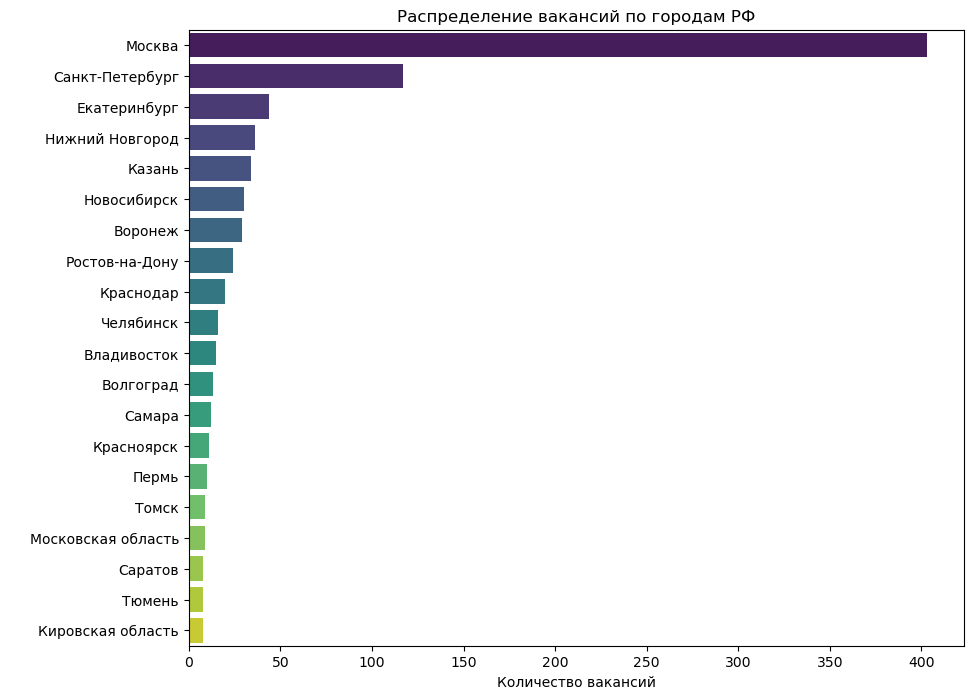

In [64]:
plt.figure(figsize=(10, 8))
sns.barplot(data=city_other, x='cnt', y='city', hue='city', palette='viridis')
plt.title('Распределение вакансий по городам РФ')
plt.xlabel('Количество вакансий')
plt.ylabel(' ')
plt.show()

In [63]:
my_list = []
word_cnt = {}
for x in data['key_skills']:
    if pd.notna(x) and x not in my_list:
        my_list.append(x)
for string in my_list:  
    words = string.split(',')  
    for word in words:
        word = word.strip()  
        if word:  
            if word in word_cnt:
                word_cnt[word] += 1
            else:
                word_cnt[word] = 1
df_word = pd.DataFrame(word_cnt.items(), columns=['word', 'cnt'])
df_word = df_word.sort_values(by='cnt', ascending=False).reset_index().head(20)

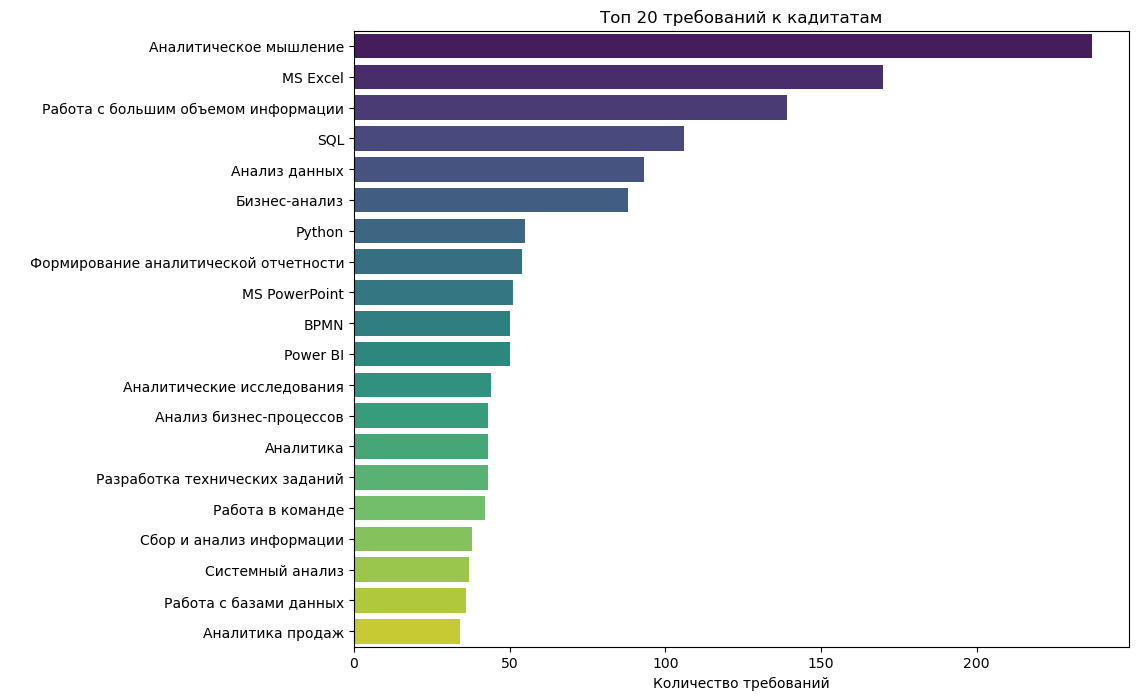

In [62]:
plt.figure(figsize=(10, 8))
sns.barplot(data=df_word, x='cnt', y='word', hue='word', palette='viridis')
plt.title('Топ 20 требований к кадитатам')
plt.xlabel('Количество требований')
plt.ylabel(' ')
plt.show()

In [11]:
experience = data.groupby('experience').size().sort_values(ascending=False).reset_index(name='cnt').head(3)
schedule = data.groupby('schedule').size().sort_values(ascending=False).reset_index(name='cnt').head(2)

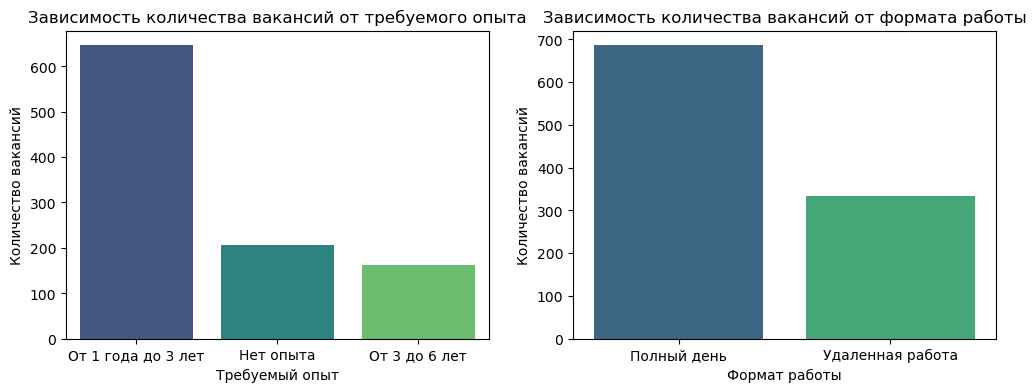

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.barplot(data=experience, x='experience', y='cnt', hue='experience', palette='viridis', ax=axs[0])
sns.barplot(data=schedule, x='schedule', y='cnt',  hue='schedule', palette='viridis', ax=axs[1])
axs[0].set_title('Зависимость количества вакансий от требуемого опыта')
axs[0].set_xlabel('Требуемый опыт')
axs[0].set_ylabel('Количество вакансий')
axs[1].set_title('Зависимость количества вакансий от формата работы')
axs[1].set_xlabel('Формат работы')
axs[1].set_ylabel('Количество вакансий')
plt.show()

In [58]:
column_num = df.select_dtypes(include=['number'])
column_num = column_num.drop('id', axis=1)
matrix_corr = column_num.corr()

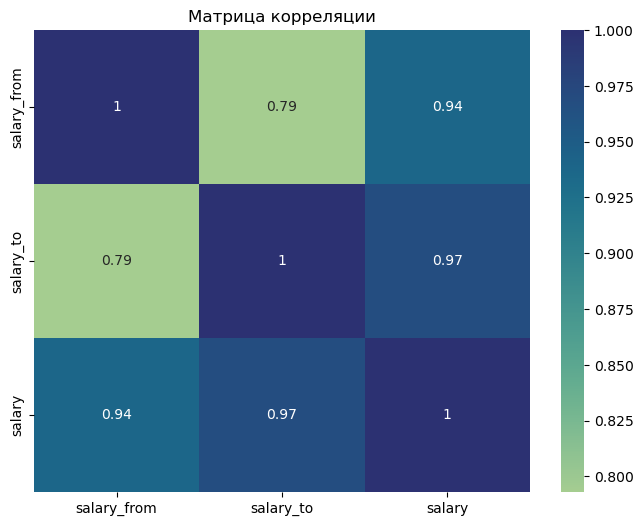

In [59]:
plt.figure(figsize=(8, 6))  
sns.heatmap(data=matrix_corr, annot=True, cmap="crest")
plt.title('Матрица корреляции')
plt.show()

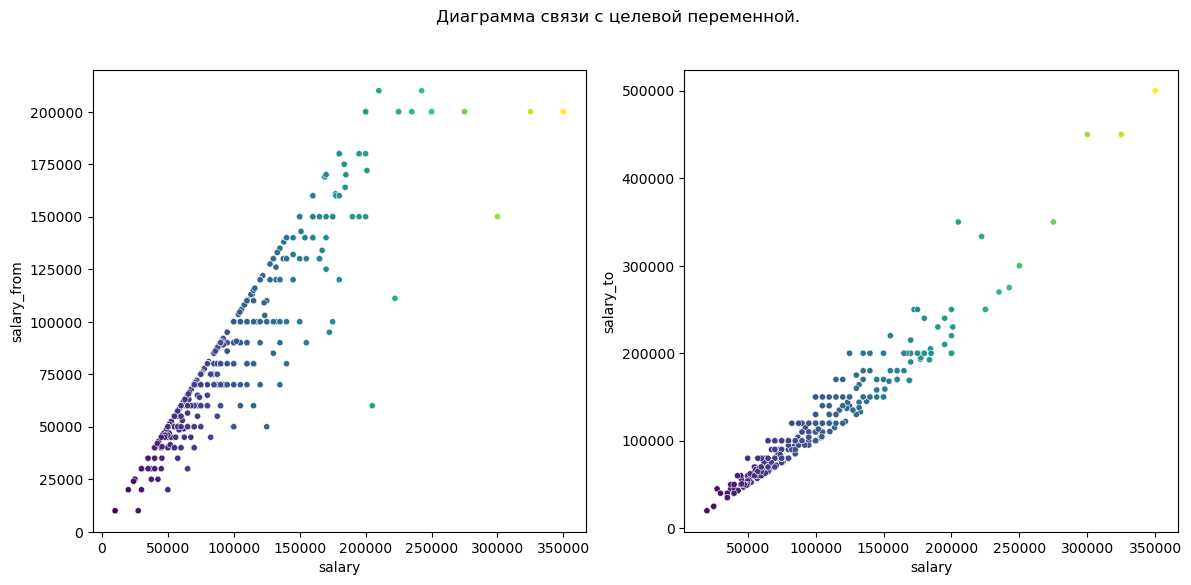

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Диаграмма связи с целевой переменной.')
sns.scatterplot(data=df, x='salary', y='salary_from', hue='salary', legend=False, palette='viridis', ax=axs[0], s=20)
sns.scatterplot(data=df, x='salary', y='salary_to', hue='salary', legend=False, palette='viridis', ax=axs[1], s=20)
plt.show()

In [53]:
q_1 = data['salary_from'].quantile(0.25)
q_3 = data['salary_from'].quantile(0.75)
iqr = q_3 - q_1
low = q_1 - 1.5 * iqr
upp = q_3 + 1.5 * iqr
df = data.query('salary_from >= @low & salary_from <= @upp')

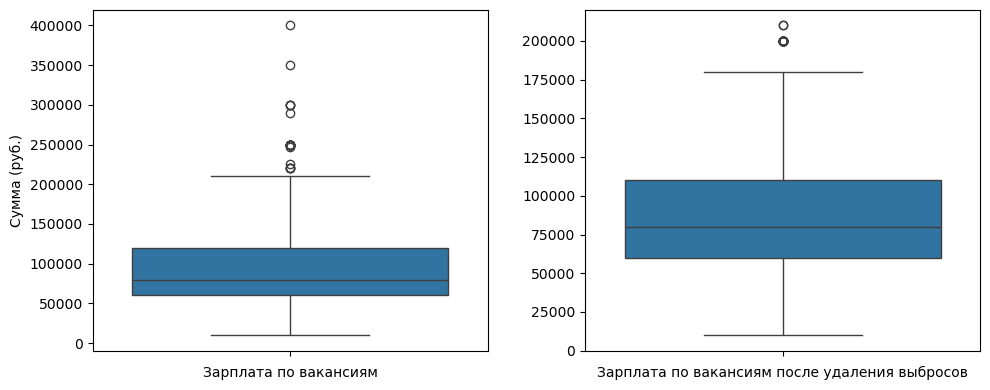

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
sns.boxplot(y=data['salary_from'],  ax=axs[0], orient='v')
axs[0].set_xlabel("Зарплата по вакансиям")
axs[0].set_ylabel('Сумма (руб.)')
sns.boxplot(y=df['salary_from'], ax=axs[1], orient='v')
axs[1].set_xlabel("Зарплата по вакансиям после удаления выбросов")
axs[1].set_ylabel(' ')
plt.tight_layout()
plt.show()

In [56]:
A = df[df['experience'] == 'От 1 года до 3 лет']
B = df[df['experience'] == 'Нет опыта']
C = df[df['experience'] == 'От 3 до 6 лет']
D = df[df['experience'] == 'Более 6 лет']
AA = df[df['schedule'] == 'Удаленная работа']
BB = df[df['schedule'] == 'Полный день']
CC = df[df['schedule'] == 'Гибкий график']
DD = df[df['schedule'] == 'Сменный график']

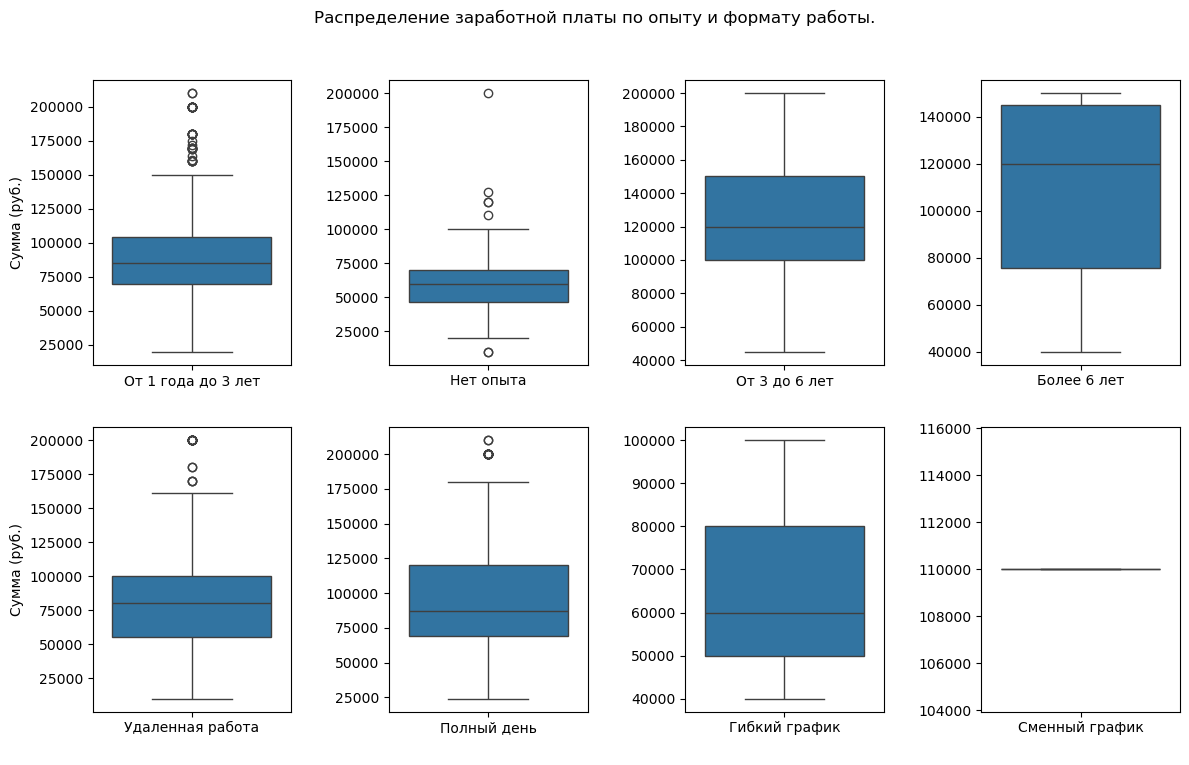

In [55]:
fig, axs = plt.subplots(2, 4, figsize=(12, 8))  
fig.suptitle('Распределение заработной платы по опыту и формату работы.') 
sns.boxplot(data=A, x='experience', y='salary_from', ax=axs[0, 0])
axs[0, 0].set_ylabel('Сумма (руб.)') 
axs[0, 0].set_xlabel(' ')
sns.boxplot(data=B, x='experience', y='salary_from', ax=axs[0, 1])
axs[0, 1].set_ylabel(' ')
axs[0, 1].set_xlabel(' ')
sns.boxplot(data=C, x='experience', y='salary_from', ax=axs[0, 2])
axs[0, 2].set_ylabel(' ')
axs[0, 2].set_xlabel(' ')
sns.boxplot(data=D, x='experience', y='salary_from', ax=axs[0, 3])
axs[0, 3].set_ylabel(' ') 
axs[0, 3].set_xlabel(' ') 
sns.boxplot(data=AA, x='schedule', y='salary_from', ax=axs[1, 0])
axs[1, 0].set_ylabel('Сумма (руб.)') 
axs[1, 0].set_xlabel(' ')
sns.boxplot(data=BB, x='schedule', y='salary_from', ax=axs[1, 1])
axs[1, 1].set_ylabel(' ')
axs[1, 1].set_xlabel(' ')
sns.boxplot(data=CC, x='schedule', y='salary_from', ax=axs[1, 2])
axs[1, 2].set_ylabel(' ')
axs[1, 2].set_xlabel(' ')
sns.boxplot(data=DD, x='schedule', y='salary_from', ax=axs[1, 3])
axs[1, 3].set_ylabel(' ') 
axs[1, 3].set_xlabel(' ')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

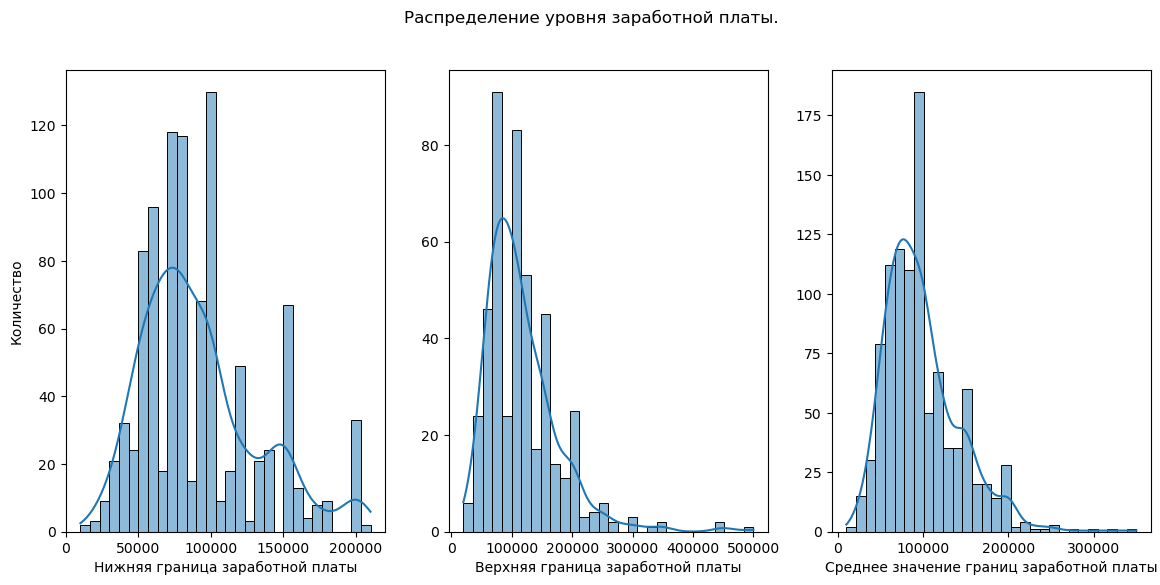

In [57]:
fig, axs = plt.subplots(1, 3, figsize=(14, 6)) 
fig.suptitle('Распределение уровня заработной платы.')
sns.histplot(data=df, x='salary_from', kde=True, bins=30, ax=axs[0])
axs[0].set_xlabel('Нижняя граница заработной платы')
axs[0].set_ylabel('Количество')
sns.histplot(data=df, x='salary_to', kde=True, bins=30, ax=axs[1])
axs[1].set_ylabel(' ')
axs[1].set_xlabel('Верхняя граница заработной платы')
sns.histplot(data=df, x='salary', kde=True, bins=30, ax=axs[2])
axs[2].set_xlabel('Cреднее значение границ заработной платы')
axs[2].set_ylabel(' ')
plt.show()